In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_bikes = pd.read_csv('../input/data-wrangling-bike-rentals/bike_rentals_cleaned.csv')

df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [2]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

# Building Gradient Boosting model from scratch

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree1= DecisionTreeRegressor(max_depth=2, random_state=2)
tree1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [4]:
y_train_preds = tree1.predict(X_train)

y2_train = y_train - y_train_preds

In [5]:
tree2 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [6]:
y2_train_preds = tree2.predict(X_train)

y3_train = y2_train - y2_train_preds

In [7]:
tree3 = DecisionTreeRegressor(max_depth=2, random_state=2)

tree3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [8]:
y1_preds = tree1.predict(X_test)
y2_preds = tree2.predict(X_test)
y3_preds = tree3.predict(X_test)

In [9]:
y_preds = y1_preds + y2_preds + y3_preds

In [10]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_preds, y_test)**0.5
mse

911.0479538776444

# Building Gradient Boosting Model using Scikit learn

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

greg = GradientBoostingRegressor(n_estimators=3,max_depth=2, random_state=2, learning_rate=1.0)

greg.fit(X_train, y_train)
y_preds = greg.predict(X_test)

mse = mean_squared_error(y_preds, y_test)**0.5
mse



911.0479538776439

In [12]:
greg = GradientBoostingRegressor(n_estimators=30, max_depth=2, random_state=2, learning_rate=1.0)

greg.fit(X_train,y_train)
y_preds = greg.predict(X_test)
mse = mean_squared_error(y_preds, y_test)**0.5
mse

857.1072323426944

In [13]:
greg = GradientBoostingRegressor(n_estimators=300, max_depth=2, random_state=2, learning_rate=1.0)
greg.fit(X_train, y_train)
y_preds = greg.predict(X_test)
mse = mean_squared_error(y_preds, y_test)**0.5
mse

936.3617413678853

In [14]:
greg = GradientBoostingRegressor(n_estimators=300, max_depth=2,random_state=2)
greg.fit(X_train, y_train)
y_preds = greg.predict(X_test)
mse = mean_squared_error(y_preds, y_test)**0.5
mse

653.7456840231495

# Hyperparameter tuning

In [15]:
# Learning Rate
learning_rate_values = [0.001,0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

for value in learning_rate_values:
    greg = GradientBoostingRegressor(learning_rate=value, max_depth=2, n_estimators=300, random_state=2)
    greg.fit(X_train, y_train)
    y_preds = greg.predict(X_test)
    mse = mean_squared_error(y_preds, y_test)**0.5
    print('Learning Rate:', value, 'MSE:' ,mse)

Learning Rate: 0.001 MSE: 1633.0261400367258
Learning Rate: 0.01 MSE: 831.5430182728547
Learning Rate: 0.05 MSE: 685.0192988749717
Learning Rate: 0.1 MSE: 653.7456840231495
Learning Rate: 0.15 MSE: 687.666134269379
Learning Rate: 0.2 MSE: 664.312804425697
Learning Rate: 0.3 MSE: 689.4190385930236
Learning Rate: 0.5 MSE: 693.8856905068778
Learning Rate: 1.0 MSE: 936.3617413678853


As you can see from the output, the default learning_rate value of 0.1 gives the best score for 300 trees.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

N_Est: 30 Learning Rate: 0.001 RMSE: 1942.4494112631814
N_Est: 30 Learning Rate: 0.01 RMSE: 1631.1821883207658
N_Est: 30 Learning Rate: 0.05 RMSE: 1020.2704182412101
N_Est: 30 Learning Rate: 0.1 RMSE: 816.8923095641749
N_Est: 30 Learning Rate: 0.15 RMSE: 758.7146982297297
N_Est: 30 Learning Rate: 0.2 RMSE: 723.2195140241369
N_Est: 30 Learning Rate: 0.3 RMSE: 705.0648962066227
N_Est: 30 Learning Rate: 0.5 RMSE: 712.0147889111909
N_Est: 30 Learning Rate: 1.0 RMSE: 857.1072323426944


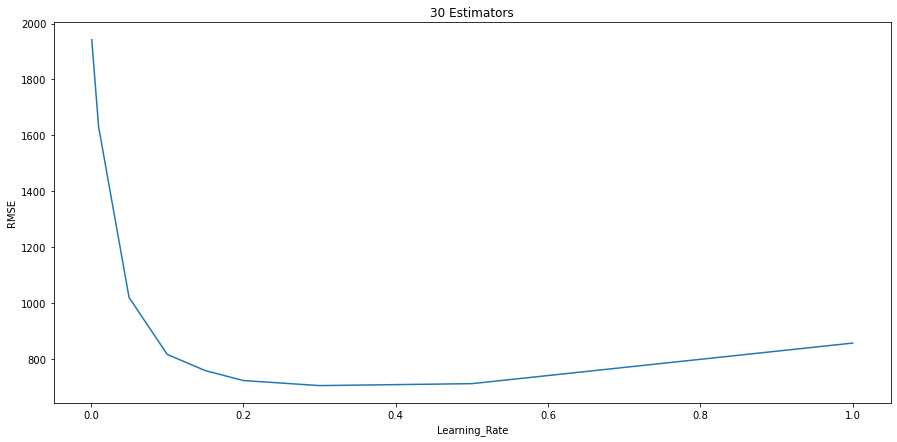

N_Est: 300 Learning Rate: 0.001 RMSE: 1633.0261400367258
N_Est: 300 Learning Rate: 0.01 RMSE: 831.5430182728547
N_Est: 300 Learning Rate: 0.05 RMSE: 685.0192988749717
N_Est: 300 Learning Rate: 0.1 RMSE: 653.7456840231495
N_Est: 300 Learning Rate: 0.15 RMSE: 687.666134269379
N_Est: 300 Learning Rate: 0.2 RMSE: 664.312804425697
N_Est: 300 Learning Rate: 0.3 RMSE: 689.4190385930236
N_Est: 300 Learning Rate: 0.5 RMSE: 693.8856905068778
N_Est: 300 Learning Rate: 1.0 RMSE: 936.3617413678853


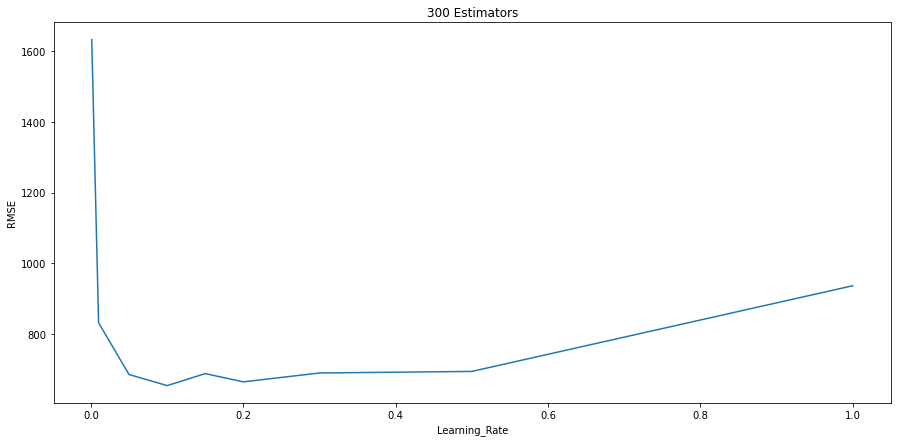

N_Est: 3000 Learning Rate: 0.001 RMSE: 833.3969271105901
N_Est: 3000 Learning Rate: 0.01 RMSE: 657.6148014941521
N_Est: 3000 Learning Rate: 0.05 RMSE: 682.9065694015884
N_Est: 3000 Learning Rate: 0.1 RMSE: 672.9003273253688
N_Est: 3000 Learning Rate: 0.15 RMSE: 702.6671711067352
N_Est: 3000 Learning Rate: 0.2 RMSE: 673.13671999295
N_Est: 3000 Learning Rate: 0.3 RMSE: 705.3628705117246
N_Est: 3000 Learning Rate: 0.5 RMSE: 704.3625015524514
N_Est: 3000 Learning Rate: 1.0 RMSE: 941.771465583258


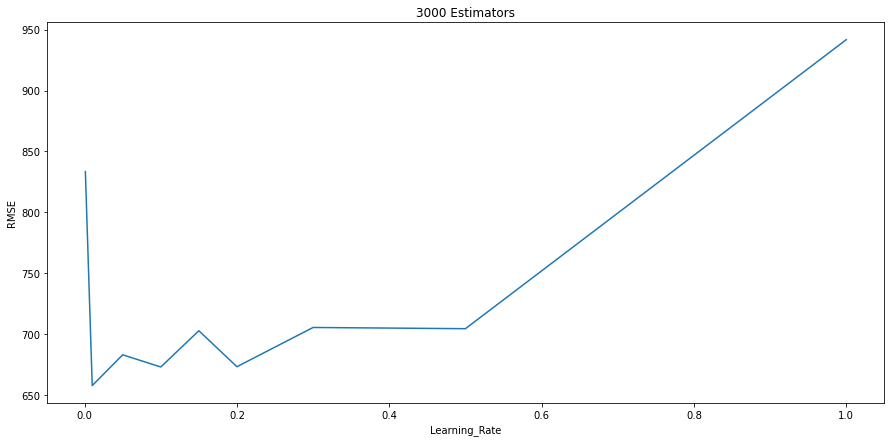

In [17]:
# n_estimator
n_estimators_value = [30, 300, 3000]

for value in n_estimators_value:
    learning_rate_list = []
    RMSE_list = []
    for lr_value in learning_rate_values:
        greg = GradientBoostingRegressor(n_estimators=value, max_depth=2, random_state=2, learning_rate=lr_value)
        greg.fit(X_train, y_train)
        y_preds = greg.predict(X_test)
        rmse = mean_squared_error(y_preds, y_test)**0.5
        print('N_Est:', value, 'Learning Rate:', lr_value, 'RMSE:', rmse)
        learning_rate_list.append(lr_value)
        RMSE_list.append(rmse)
    plt.figure(figsize=(15,7))
    plt.plot(learning_rate_list, RMSE_list)
    plt.xlabel('Learning_Rate')
    plt.ylabel('RMSE')
    plt.title('{0} Estimators'.format(value))
    plt.savefig('{0} Estimators - Learning_Rate VS RMSE'.format(value))
    plt.show()

In [18]:
# Base Learner
depths = [None, 1, 2, 3, 4]

for depth in depths:
    greg = GradientBoostingRegressor(n_estimators=300, max_depth=depth, random_state=2)
    greg.fit(X_train, y_train)
    y_preds = greg.predict(X_test)
    rmse = mean_squared_error(y_preds, y_test)**0.5
    print('Max Depth:',depth,'RMSE:',rmse)


Max Depth: None RMSE: 869.2783041945797
Max Depth: 1 RMSE: 707.8261886858736
Max Depth: 2 RMSE: 653.7456840231495
Max Depth: 3 RMSE: 646.4045923317708
Max Depth: 4 RMSE: 663.048387855927


Max Depth of 3 gives best result

In [19]:
# subsample

samples = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]

for sample in samples:
    greg = GradientBoostingRegressor(max_depth=3, n_estimators=300, random_state=2, subsample=sample)
    greg.fit(X_train, y_train)
    y_preds = greg.predict(X_test)
    rmse = mean_squared_error(y_preds, y_test)**0.5
    print('Subsample:',sample, 'RMSE:',rmse)


Subsample: 1.0 RMSE: 646.4045923317708
Subsample: 0.9 RMSE: 620.1819001443569
Subsample: 0.8 RMSE: 617.2355650565677
Subsample: 0.7 RMSE: 612.9879156983139
Subsample: 0.6 RMSE: 622.6385116402317
Subsample: 0.5 RMSE: 626.9974073227554


A subsample value of 0.7 with 300 trees and max_depth of 3 produces the best score yet.

# RandomizedSearchCV

In [20]:
params = {'subsample':[0.65, 0.7, 0.75],
         'n_estimators':[300, 500, 1000],
         'learning_rate':[0.05, 0.075, 0.1]}

In [21]:
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(max_depth=3, random_state=2)

rand_reg = RandomizedSearchCV(gbr, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, n_iter=10, random_state=2)
rand_reg.fit(X_train, y_train)
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
print('Best params:' , best_params)
best_score = np.sqrt(-rand_reg.best_score_)
print('Training Score: {:.3f}'.format(best_score))
y_preds = best_model.predict(X_test)
rmse = mean_squared_error(y_preds, y_test)**0.5
print('RMSE: {:.3f}'.format(rmse))




Best params: {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05}
Training Score: 636.200
RMSE: 625.985


In [22]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1600, learning_rate=0.02, subsample=0.75, random_state=2)
gbr.fit(X_train, y_train)
y_preds = gbr.predict(X_test)
rmse = mean_squared_error(y_preds, y_test)**0.5
print('RMSE:',rmse)


RMSE: 596.9544588974487


With a larger value for n_estimators at 1600, a smaller learning_rate value at 0.02, a comparable subsample value of
0.75, and the same max_depth value of 3, we obtained the best Root Mean Square Error (RMSE) yet at 597.

# XGBoost

In [23]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, subsample=0.75, eta=0.02, random_state=2)
xg_reg.fit(X_train, y_train)
y_preds = xg_reg.predict(X_test)
rmse = mean_squared_error(y_preds, y_test)**0.5
print('RMSE:',rmse)

RMSE: 584.339544309016
